In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels import PanelOLS

In [2]:
path = '/Users/gianlucafilesi/Library/CloudStorage/OneDrive-EDHEC/04 THESIS/00_FINAL/DS/'

GDP dataset source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD  
GDP per capita dataset source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

In [3]:
gdp = pd.read_csv(path+'GDP.csv',skiprows=4) # Upload the GDP data
gdp_pc = pd.read_csv(path+'GDP-PC.csv',skiprows=4) # Upload the GDP per capita data

HDR dataset source: https://hdr.undp.org/data-center/documentation-and-downloads

In [4]:
hdr = pd.read_excel(path+'hdr-data.xlsx') # Upload the HDR data
hdr.isnull().sum() # Check for missing values

countryIsoCode         0
country                0
indexCode              0
index                  0
dimension         186115
indicatorCode          0
indicator              0
year                   7
value                  0
note              185973
dtype: int64

In [5]:
Countries = {hdr['countryIsoCode'][i]:hdr['country'][i] for i in range(len(hdr))} # Create a dictionary to map country codes to country names

In [6]:
HDR = hdr.copy().drop(columns=['dimension','note','country']) # Drop unnecessary columns
HDR['year'] = pd.to_datetime(HDR['year'], format='%Y',errors='coerce').dt.year # Convert year to datetime format
HDR.rename(columns={'countryIsoCode':'CCode'},inplace=True) # Rename columns for consistency

In [7]:
'''
Since the HDR data contains multiple indices, we need to separate them into different dataframes.
We will create a dictionary to store these dataframes, where the keys are the index codes and the values are the corresponding dataframes.
'''
indecies = HDR['indexCode'].unique() # Get unique Country codes
grouped_dfs = {} # Create a dictionary to store dataframes for each index

for code in indecies:
    grouped_dfs[code] = HDR[HDR['indexCode'] == code].drop(columns=['indexCode', 'index']) # Drop unnecessary columns

GII = grouped_dfs.get('GII') # Get the GII dataframe
HDI = grouped_dfs.get('HDI') # Get the HDI dataframe
GDI = grouped_dfs.get('GDI') # Get the GDI dataframe
IHDI = grouped_dfs.get('IHDI') # Get the IHDI dataframe
PHDI = grouped_dfs.get('PHDI') # Get the PHDI dataframe
MPI = grouped_dfs.get('MPI') # Get the MPI dataframe


In [8]:
def Pivoting(df): # Function to pivot the dataframe
    df_r = df.pivot(index=['CCode','year'], 
                       columns='indicator', 
                       values='value')
    df_r.reset_index(inplace=True)
    df_r.columns.name = None
    return df_r

GII explanation: https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII  

GII reflects gender-based disadvantage in three dimensions— reproductive health, empowerment and the labour market—for as many countries as data of reasonable quality allow. It shows the loss in potential human development due to inequality between female and male achievements in these dimensions. It ranges from 0, where women and men fare equally, to 1, where one gender fares as poorly as possible in all measured dimensions. GII values are computed using the association-sensitive inequality measure suggested by Seth (2009), which implies that the index is based on the general mean of general means of different orders—the first aggregation is by a geometric mean across dimensions; these means, calculated separately for women and men, are then aggregated using a harmonic mean across genders.

In [9]:
GII_r = Pivoting(GII) # Pivot the GII dataframe
GII_r.drop(columns=['GII Rank'],inplace=True) # Drop the GII Rank column
col_to_move = GII_r.pop('Gender Inequality Index (value)')
GII_r.insert(3, 'GII_value', col_to_move) # Move the GII value column to the 3rd position
GII_r

,CCode,year,"Adolescent Birth Rate (births per 1,000 women ages 15-19)",GII_value,"Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older)","Maternal Mortality Ratio (deaths per 100,000 live births)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)","Share of seats in parliament, male (% held by men)"
0,AFG,1990.0,142.960,NaN,NaN,NaN,1377.859,1.108,7.899,NaN,NaN
1,AFG,1991.0,147.525,NaN,NaN,NaN,1392.786,1.221,8.138,NaN,NaN
2,AFG,1992.0,147.521,NaN,NaN,NaN,1451.594,1.335,8.377,NaN,NaN
3,AFG,1993.0,147.896,NaN,NaN,NaN,1368.816,1.449,8.616,NaN,NaN
4,AFG,1994.0,155.669,NaN,NaN,NaN,1375.091,1.562,8.855,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6801,ZZM.LDC,2022.0,92.400,0.556,50.4,75.5,NaN,23.400,33.800,25.1,NaN
6802,ZZN.SIDS,2020.0,NaN,NaN,NaN,NaN,203.000,NaN,NaN,NaN,NaN
6803,ZZN.SIDS,2022.0,50.600,0.457,51.4,69.8,NaN,58.800,62.300,27.0,NaN
6804,ZZO.OECD,2020.0,NaN,NaN,NaN,NaN,21.000,NaN,NaN,NaN,NaN


GDI explanation: https://hdr.undp.org/gender-development-index#/indicies/GDI  

GDI measures gender inequalities in achievement in three basic dimensions of human development: health, measured by female and male life expectancy at birth; education, measured by female and male expected years of schooling for children and female and male mean years of schooling for adults ages 25 years and older; and command over economic resources, measured by female and male estimated earned income.

In [10]:
GDI_r = Pivoting(GDI) # Pivot the GDI dataframe
col_to_move = GDI_r.pop('Gender Development Index (value)') # Move the GDI value column to the 3rd position
GDI_r.insert(3, 'GDI_value', col_to_move)
col_to_move = GDI_r.pop('GDI Group') # Move the GDI Group column to the 4th position
GDI_r.insert(4, 'GDI Group', col_to_move)
GDI_r

,CCode,year,"Expected Years of Schooling, female (years)",GDI_value,GDI Group,"Expected Years of Schooling, male (years)","Gross National Income Per Capita, female (2017 PPP$)","Gross National Income Per Capita, male (2017 PPP$)",HDI female,HDI male,"Life Expectancy at Birth, female (years)","Life Expectancy at Birth, male (years)","Mean Years of Schooling, female (years)","Mean Years of Schooling, male (years)"
0,AFG,1990.0,2.117,NaN,NaN,4.533,NaN,NaN,NaN,NaN,48.397,43.709,0.202,1.494
1,AFG,1991.0,2.246,NaN,NaN,4.768,NaN,NaN,NaN,NaN,49.144,44.353,0.219,1.579
2,AFG,1992.0,2.383,NaN,NaN,5.016,NaN,NaN,NaN,NaN,50.320,45.070,0.236,1.664
3,AFG,1993.0,2.528,NaN,NaN,5.277,NaN,NaN,NaN,NaN,52.739,50.216,0.254,1.749
4,AFG,1994.0,2.682,NaN,NaN,5.551,NaN,NaN,NaN,NaN,53.544,49.531,0.271,1.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,ZZK.WORLD,2022.0,13.082,0.951,NaN,12.908,12515.518,22034.766,0.719,0.756,74.532,69.599,8.231,9.118
6798,ZZL.DC,2022.0,12.600,0.929,NaN,12.500,7283.000,14943.000,0.716,0.665,72.900,68.200,7.100,8.200
6799,ZZM.LDC,2022.0,9.900,0.890,NaN,10.300,2042.000,4054.000,0.509,0.572,67.400,62.500,4.300,5.900
6800,ZZN.SIDS,2022.0,12.900,0.979,NaN,12.300,13079.000,19712.000,0.722,0.738,74.300,69.000,8.500,8.800


HDI explanation: https://hdr.undp.org/data-center/human-development-index#/indicies/HDI  


The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

In [11]:
HDI_r = Pivoting(HDI)
HDI_r.drop(columns=['HDI Rank'],inplace=True)
col_to_move = HDI_r.pop('Human Development Index (value)')
HDI_r.insert(3, 'HDI_value', col_to_move)
HDI_r

,CCode,year,Expected Years of Schooling (years),HDI_value,Gross National Income Per Capita (2017 PPP$),Life Expectancy at Birth (years),Mean Years of Schooling (years)
0,AFG,1990.0,2.936,0.284,3115.670,45.967,0.872
1,AFG,1991.0,3.228,0.292,2817.305,46.663,0.915
2,AFG,1992.0,3.520,0.299,2474.682,47.596,0.959
3,AFG,1993.0,3.812,0.307,1723.020,51.466,1.002
4,AFG,1994.0,4.104,0.300,1202.010,51.495,1.045
...,...,...,...,...,...,...,...
6825,ZZO.OECD,2015.0,NaN,0.894,NaN,NaN,NaN
6826,ZZO.OECD,2019.0,NaN,0.905,NaN,NaN,NaN
6827,ZZO.OECD,2020.0,NaN,0.897,NaN,NaN,NaN
6828,ZZO.OECD,2021.0,NaN,0.899,NaN,NaN,NaN


Countries can be divided in 4 categories: Very high human development (>0.8), High human development (0.700-0.799), Medium human development (0.550-0.699), Low human development (<0.550). https://hdr.undp.org/sites/default/files/2023-24_HDR/hdr2023-24_technical_notes.pdf  

In [12]:
bins = [0, 0.55, 0.7, 0.8, 1]
labels = ['L', 'M', 'H', 'VH']

HDI_r['Category'] = pd.cut(HDI_r['HDI_value'], bins=bins, labels=labels, include_lowest=True)

IHDI explanation: https://hdr.undp.org/inequality-adjusted-human-development-index#/indicies/IHDI  

IHDI is based on a distribution-sensitive class of composite indices proposed by Foster, Lopez-Calva and Szekely (2005), which draws on the Atkinson (1970) family of inequality measures. It is computed as a geometric mean of inequality-adjusted dimensional indices. The IHDI accounts for inequalities in HDI dimensions by “discounting” each dimension’s average value according to its level of inequality. The IHDI value equals the HDI value when there is no inequality across people but falls below the HDI value as inequality rises. In this sense, the IHDI measures the level of human development when inequality is accounted for.

In [13]:
IHDI_r = Pivoting(IHDI)
col_to_move = IHDI_r.pop('Inequality-adjusted Human Development Index (value)')
IHDI_r.insert(3, 'IHDI_value', col_to_move)
IHDI_r

,CCode,year,Coefficient of human inequality,IHDI_value,Inequality in eduation,Inequality in income,Inequality in life expectancy,Overall loss (%)
0,AFG,2010.0,35.768,0.287,44.823,28.638,33.842,36.080
1,AFG,2011.0,35.453,0.293,44.823,28.638,32.897,35.886
2,AFG,2012.0,34.755,0.302,44.823,27.406,32.036,35.332
3,AFG,2013.0,34.478,0.309,44.823,27.406,31.204,34.947
4,AFG,2014.0,34.322,0.313,44.823,27.406,30.736,34.792
...,...,...,...,...,...,...,...,...
2677,ZZK.WORLD,2022.0,21.732,0.576,21.725,30.330,13.141,22.057
2678,ZZL.DC,2022.0,24.200,0.524,25.000,32.500,14.900,NaN
2679,ZZM.LDC,2022.0,32.700,0.363,36.200,38.600,23.400,NaN
2680,ZZN.SIDS,2022.0,23.200,0.558,22.000,32.700,14.900,NaN


In [14]:
GDP = gdp.copy().drop(columns=['Country Name','Indicator Name','Indicator Code','Unnamed: 68'])
GDP.rename(columns={'Country Code':'CCode'},inplace=True)
GDP = GDP.melt(id_vars=['CCode'],var_name='year',value_name='GDP_value')
GDP['year'] = pd.to_datetime(GDP['year'], format='%Y',errors='coerce').dt.year
GDP

,CCode,year,GDP_value
0,ABW,1960,NaN
1,AFE,1960,2.421063e+10
2,AFG,1960,NaN
3,AFW,1960,1.190495e+10
4,AGO,1960,NaN
...,...,...,...
17019,XKX,2023,1.046822e+10
17020,YEM,2023,NaN
17021,ZAF,2023,3.806993e+11
17022,ZMB,2023,2.757796e+10


In [15]:
GDP_PC = gdp_pc.copy().drop(columns=['Indicator Name','Indicator Code','Unnamed: 68','Country Name'])
GDP_PC.rename(columns={'Country Code':'CCode'},inplace=True)
GDP_PC = GDP_PC.melt(id_vars=['CCode'],var_name='year',value_name='GDP_PC_value')
GDP_PC['year'] = pd.to_datetime(GDP_PC['year'], format='%Y',errors='coerce').dt.year
GDP

,CCode,year,GDP_value
0,ABW,1960,NaN
1,AFE,1960,2.421063e+10
2,AFG,1960,NaN
3,AFW,1960,1.190495e+10
4,AGO,1960,NaN
...,...,...,...
17019,XKX,2023,1.046822e+10
17020,YEM,2023,NaN
17021,ZAF,2023,3.806993e+11
17022,ZMB,2023,2.757796e+10


## GII on GDP

In [16]:
GDP_reduced = GDP[GDP['year']>=GDI_r['year'].min()]
GDP_GII = pd.merge(
    GDP_reduced, GII_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_GII.columns.name = None

In [17]:
GDP_GII.isnull().sum() # Check for missing values

CCode                                                                                 0
year                                                                                  0
GDP_value                                                                           132
Adolescent Birth Rate (births per 1,000 women ages 15-19)                             0
GII_value                                                                          2030
Labour force participation rate, female (% ages 15 and older)                      1438
Labour force participation rate, male (% ages 15 and older)                        1438
Maternal Mortality Ratio (deaths per 100,000 live births)                           363
Population with at least some secondary education, female (% ages 25 and older)     981
Population with at least some secondary education, male (% ages 25 and older)       981
Share of seats in parliament, female (% held by women)                              493
Share of seats in parliament, ma

In [18]:
GDP_GII.describe() # Describe the dataset   

,year,GDP_value,"Adolescent Birth Rate (births per 1,000 women ages 15-19)",GII_value,"Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older)","Maternal Mortality Ratio (deaths per 100,000 live births)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)","Share of seats in parliament, male (% held by men)"
count,6435.000000,6.303000e+03,6435.000000,4405.000000,4997.000000,4997.00000,6072.000000,5454.000000,5454.000000,5942.000000,5942.000000
mean,2006.000000,2.856615e+11,59.149155,0.383915,49.591567,72.16587,223.347002,50.316649,56.566233,16.522283,83.477717
std,9.522645,1.314347e+12,46.346910,0.194580,15.955558,9.39621,361.370865,30.259830,27.735374,11.121013,11.121013
min,1990.000000,9.542901e+06,0.876000,0.009000,5.610000,29.63000,1.082000,0.420000,2.050000,0.010000,42.453000
25%,1998.000000,3.352931e+09,19.327500,0.211000,40.700000,66.36000,17.430000,23.137250,33.075000,8.164000,77.133250
50%,2006.000000,1.573079e+10,48.438000,0.396000,50.950000,72.62000,68.407000,49.837500,55.005000,14.286000,85.714000
75%,2014.000000,1.060777e+11,88.604000,0.542000,58.710000,78.60000,301.331250,77.600250,82.663750,22.866750,91.836000
max,2022.000000,2.600689e+13,214.486000,0.838000,94.400000,100.00000,6591.344000,100.000000,100.000000,57.547000,99.990000


In [19]:
GDP_GII['GII_value'].dropna(inplace=True) # Drop missing values
GDP_GII['GDP_value'].dropna(inplace=True) # Drop missing values

In [20]:
model1_df = GDP_GII[['year','CCode','GDP_value','GII_value']].dropna()
model1_df = model1_df.set_index(['CCode', 'year'])

mod_fe = PanelOLS.from_formula('GDP_value	~ GII_value + 1', data=model1_df).fit() # EntityEffects ?
mod_fe.summary

Dep. Variable:,GDP_value,R-squared:,0.0440
Estimator:,PanelOLS,R-squared (Between):,0.0485
No. Observations:,4388,R-squared (Within):,0.0310
Date:,"Fri, Apr 25 2025",R-squared (Overall):,0.0440
Time:,15:32:41,Log-likelihood,-1.293e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,202.10
Entities:,166,P-value,0.0000
Avg Obs:,26.434,Distribution:,"F(1,4386)"
Min Obs:,1.0000,,
Max Obs:,33.000,F-statistic (robust):,202.10


## GII on GDP_PC

In [21]:
GDP_PC_reduced = GDP_PC[GDP_PC['year']>=GDI_r['year'].min()]
GDP_PC_GII = pd.merge(
    GDP_PC_reduced, GII_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_PC_GII.columns.name = None

In [22]:
model2_df = GDP_PC_GII[['year','CCode','GDP_PC_value','GII_value']].dropna()
model2_df = model2_df.set_index(['CCode', 'year'])

mod_fe = PanelOLS.from_formula('GDP_PC_value ~ GII_value + 1', data=model2_df).fit() # EntityEffects ?
mod_fe.summary

Dep. Variable:,GDP_PC_value,R-squared:,0.4312
Estimator:,PanelOLS,R-squared (Between):,0.4318
No. Observations:,4392,R-squared (Within):,0.1749
Date:,"Fri, Apr 25 2025",R-squared (Overall):,0.4312
Time:,15:32:41,Log-likelihood,-4.801e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,3328.7
Entities:,166,P-value,0.0000
Avg Obs:,26.458,Distribution:,"F(1,4390)"
Min Obs:,1.0000,,
Max Obs:,33.000,F-statistic (robust):,3328.7


## GII on GPD, divided by HDI categories

In [23]:
GDP_GII_HDI = pd.merge(
    GDP_GII, HDI_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_GII_HDI.columns.name = None

In [24]:
model3_df = GDP_GII_HDI[['year','CCode','GDP_value','GII_value','Category']].dropna()
Dummies = pd.get_dummies(model3_df['Category'],drop_first=True)
model3_df = pd.concat([model3_df, Dummies],axis= 1)
model3_df = model3_df.set_index(['CCode', 'year'])

X = ['GII_value'] + list(Dummies.columns)
formula = 'GDP_value ~ 1+'+'+'.join(X)

model3 = PanelOLS.from_formula(formula, data=model3_df).fit() # EntityEffects ?
model3.summary

Dep. Variable:,GDP_value,R-squared:,0.0596
Estimator:,PanelOLS,R-squared (Between):,0.0713
No. Observations:,4361,R-squared (Within):,-0.0065
Date:,"Fri, Apr 25 2025",R-squared (Overall):,0.0596
Time:,15:32:41,Log-likelihood,-1.285e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,68.971
Entities:,166,P-value,0.0000
Avg Obs:,26.271,Distribution:,"F(4,4356)"
Min Obs:,1.0000,,
Max Obs:,33.000,F-statistic (robust):,68.971


In [25]:
GDP_PC_GII_HDI = pd.merge(
    GDP_PC_GII, HDI_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_PC_GII_HDI.columns.name = None

In [26]:
model4_df = GDP_PC_GII_HDI[['year','CCode','GDP_PC_value','GII_value','Category']].dropna()
Dummies = pd.get_dummies(model4_df['Category'],drop_first=True)
model4_df = pd.concat([model4_df, Dummies],axis= 1)
model4_df = model4_df.set_index(['CCode', 'year'])

X = ['GII_value'] + list(Dummies.columns)
formula = 'GDP_PC_value ~ 1+'+'+'.join(X)

model4 = PanelOLS.from_formula(formula, data=model4_df).fit() # EntityEffects ?
model4.summary

Dep. Variable:,GDP_PC_value,R-squared:,0.5816
Estimator:,PanelOLS,R-squared (Between):,0.6957
No. Observations:,4365,R-squared (Within):,-0.0220
Date:,"Fri, Apr 25 2025",R-squared (Overall):,0.5816
Time:,15:32:42,Log-likelihood,-4.705e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1514.9
Entities:,166,P-value,0.0000
Avg Obs:,26.295,Distribution:,"F(4,4360)"
Min Obs:,1.0000,,
Max Obs:,33.000,F-statistic (robust):,1514.9


## New part - April

In [27]:
GDP_PC_GII.dropna(inplace=True) # Drop missing values

In [28]:
GDP_PC_GII['logGDP_PC'] = np.log(GDP_PC_GII['GDP_PC_value']) # Create a new column with the log of GDP per capita

In [29]:
Panel = GDP_PC_GII

In [30]:
Panel 

,CCode,year,GDP_PC_value,"Adolescent Birth Rate (births per 1,000 women ages 15-19)",GII_value,"Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older)","Maternal Mortality Ratio (deaths per 100,000 live births)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)","Share of seats in parliament, male (% held by men)",logGDP_PC
5,ARG,1990,4315.333294,70.928,0.489,29.11,78.68,87.814,35.312,37.850,22.796,77.204,8.369930
8,AUS,1990,18249.301454,21.673,0.185,52.25,75.59,8.256,90.139,90.637,20.536,79.464,9.811882
9,AUT,1990,21596.068220,22.827,0.202,43.03,69.42,8.927,61.966,84.630,24.696,75.304,9.980267
12,BEL,1990,20600.375279,11.956,0.180,36.55,61.04,7.881,58.005,65.906,15.837,84.163,9.933065
13,BEN,1990,371.101604,125.025,0.699,56.60,98.64,563.254,4.289,14.374,7.229,92.771,5.916476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,WSM,2022,3869.466395,43.766,0.406,49.80,80.63,59.079,92.442,86.987,12.963,87.037,8.260872
6431,YEM,2022,615.702079,52.497,0.820,5.84,64.69,183.400,23.700,38.200,0.294,99.706,6.422763
6432,ZAF,2022,6523.410978,60.891,0.401,50.82,63.46,126.833,83.043,84.881,45.374,54.626,8.783153
6433,ZMB,2022,1447.123101,116.091,0.526,54.16,66.36,134.665,33.732,51.363,15.060,84.940,7.277333


In [53]:
Panel['GII_shifted'] = Panel.groupby('CCode')['GII_value'].shift(1) # Shift the GII value column by 1 year by country
Panel.dropna(inplace=True) # Drop missing values

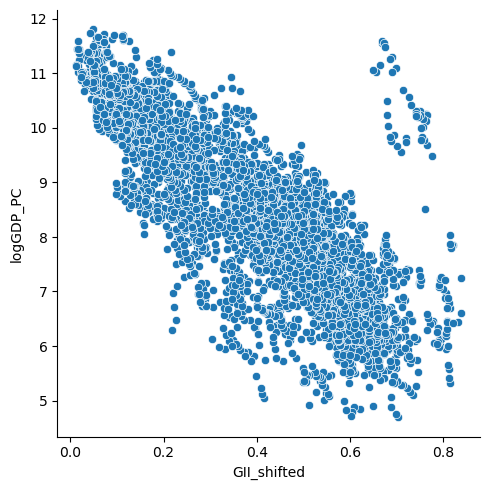

In [55]:
sns.relplot(
    data=Panel, kind="scatter",
    y="logGDP_PC", x="GII_shifted",
    facet_kws=dict(sharex=False),
)

In [ ]:
model1_df = Panel
model1_df = model1_df.set_index(['CCode', 'year'])

Y = model1_df['logGDP_PC']
X = model1_df[['GII_shifted']]
X = sm.add_constant(X)

mod_fe = PanelOLS(
    Y,
    X,
    entity_effects=True,
    time_effects=True
)

results = mod_fe.fit(
    cov_type='clustered',
    cluster_entity=True
)

print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.0070
Estimator:                   PanelOLS   R-squared (Between):              0.0870
No. Observations:                4226   R-squared (Within):               0.0775
Date:                Fri, Apr 25 2025   R-squared (Overall):              0.0943
Time:                        16:08:37   Log-likelihood                   -80.538
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      28.258
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.612   Distribution:                  F(1,4029)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             1.3787
                            

In [56]:
Panel.columns

Index(['CCode', 'year', 'GDP_PC_value',
       'Adolescent Birth Rate (births per 1,000 women ages 15-19)',
       'GII_value',
       'Labour force participation rate, female (% ages 15 and older)',
       'Labour force participation rate, male (% ages 15 and older)',
       'Maternal Mortality Ratio (deaths per 100,000 live births)',
       'Population with at least some secondary education, female (% ages 25 and older)',
       'Population with at least some secondary education, male (% ages 25 and older)',
       'Share of seats in parliament, female (% held by women)',
       'Share of seats in parliament, male (% held by men)', 'logGDP_PC',
       'GII_shifted'],
      dtype='object')

In [58]:
model1_df = Panel
model1_df = model1_df.set_index(['CCode', 'year'])

Y = model1_df['logGDP_PC']
X = model1_df[['GII_shifted','Share of seats in parliament, female (% held by women)']]
X = sm.add_constant(X)

mod_fe = PanelOLS(
    Y,
    X,
    entity_effects=True,
    time_effects=True
)

results = mod_fe.fit(
    cov_type='clustered',
    cluster_entity=True
)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.0100
Estimator:                   PanelOLS   R-squared (Between):              0.1043
No. Observations:                4226   R-squared (Within):               0.0476
Date:                Fri, Apr 25 2025   R-squared (Overall):              0.1044
Time:                        16:09:36   Log-likelihood                   -73.967
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.442
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.612   Distribution:                  F(2,4028)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             1.3092
                            

In [60]:
model1_df = Panel
model1_df = model1_df.set_index(['CCode', 'year'])

Y = model1_df['logGDP_PC']
X = model1_df[['GII_shifted','Share of seats in parliament, female (% held by women)','Population with at least some secondary education, female (% ages 25 and older)']]
X = sm.add_constant(X)

mod_fe = PanelOLS(
    Y,
    X,
    entity_effects=True,
    time_effects=True
)

results = mod_fe.fit(
    cov_type='clustered',
    cluster_entity=True
)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.0101
Estimator:                   PanelOLS   R-squared (Between):              0.1102
No. Observations:                4226   R-squared (Within):               0.0533
Date:                Fri, Apr 25 2025   R-squared (Overall):              0.1101
Time:                        16:14:56   Log-likelihood                   -73.916
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      13.658
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.612   Distribution:                  F(3,4027)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             0.9079
                            